In [93]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import itertools

import matplotlib.pyplot as plt

In [94]:
yelp = pd.read_csv('../yelp_review_cleaned.csv').head(10000)

/var/folders/qq/03sjdbt93vn87r2lrkqk8mb40000gq/T/ipykernel_31062/3745114706.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  yelp = pd.read_csv('../yelp_review_cleaned.csv').head(10000)


In [95]:
yelp.stars.value_counts()

stars
5.0    4382
4.0    2178
1.0    1516
3.0    1086
2.0     838
Name: count, dtype: int64

### Q1. Considering that the original Yelp review dataset does not have the sentiment score, we first need to generate sentiment scores for each review based on the review star. Specifically, please create a new column called ‘pos_sentiment’ and then fill the value with 0 if a review star is less than or equal to three, 1 otherwise.

In [96]:
yelp['pos_sentiment'] = yelp.stars.apply(lambda star: 1 if float(star) > 3 else 0)
yelp.pos_sentiment.value_counts()

pos_sentiment
1    6560
0    3440
Name: count, dtype: int64

### Q2. According to the data characteristics and the task, define the text preprocessing function by including all necessary steps. Alternatively, you could directly use the cleaned column from earlier exercises.

In [97]:
# Using the cleaned column from earlier exercises for text preprocessing
text_data = yelp.text_lower_no_digits_non_punct_split_non_stopwords_stemmed

### Q3. With the newly generated sentiment column, please first use CountVectorizer to generate the bag of words representation for each review. Then, use these vectors and Naïve Bayes to predict the review sentiment. Please present the accuracy, recall, F1 score, and confusion matrix of your model.

In [98]:
# Step 1: Train-Test Split
X = text_data
y = yelp.pos_sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999)

print(f"Length of data is {X.shape[0]} rows.")
print(f"Length of training vector is {X_train.shape[0]} rows.")
print(f"Length of testing vector is {X_test.shape[0]} rows.")

Length of data is 10000 rows.
Length of training vector is 7500 rows.
Length of testing vector is 2500 rows.


In [99]:
# Helper function to plot the confusion matrix
def plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

In [107]:
# Step 2: Preprocess and Vectorize train and test data
vect = CountVectorizer()
X_train_transformed = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)
print(X_train_transformed.shape, X_test_transformed.shape)

(7500, 18897) (2500, 18897)


In [101]:
# Predict using the Naïve Bayes Classifier
nb = MultinomialNB()
%time nb.fit(X_train_transformed, y_train)
y_pred_nb = nb.predict(X_test_transformed)

CPU times: user 7.05 ms, sys: 1.07 ms, total: 8.12 ms
Wall time: 8.09 ms


Naïve Bayes Accuracy: 0.8444
Naïve Bayes Recall: 0.9032455603184323
Naïve Bayes F1-score: 0.883498053309374


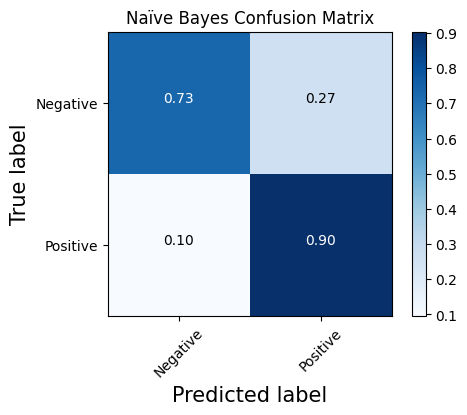

In [108]:
print("Naïve Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes Recall:",metrics.recall_score(y_test, y_pred_nb))
print("Naïve Bayes F1-score:",metrics.f1_score(y_test, y_pred_nb))

cnf_matrix = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cnf_matrix,normalize=True,title='Naïve Bayes Confusion Matrix')

### Q4. Next, please use the first alternative classifier, __Logistic Regression__ with the balanced classes, to predict the review sentiment. Please present the accuracy, recall, F1 score, and confusion matrix of your model.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.85
Logistic Regression Recall: 0.8756889161053276
Logistic Regression F1-score: 0.884080370942813


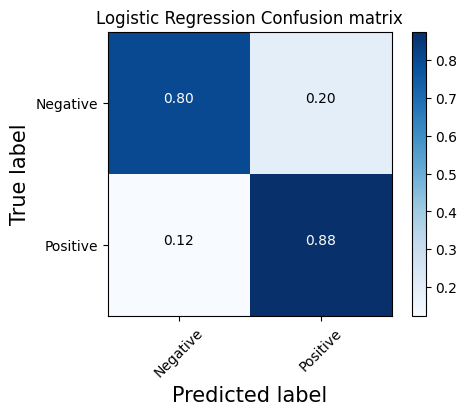

In [109]:
# Predict using the Logistic Regression Classifier
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_transformed, y_train)

y_pred_lr = logreg.predict(X_test_transformed)

# calculate evaluation measures:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Recall:",metrics.recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-score:",metrics.f1_score(y_test, y_pred_lr))

cnf_matrix = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cnf_matrix,normalize=True,title='Logistic Regression Confusion matrix')

### Q5. Next, please use the second alternative classifier, __SVM__ with the balanced dataset, to predict the review sentiment. Please present the accuracy, recall, F1 score, and confusion matrix of your model.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy:  0.818
SVM Recall: 0.848132271892223
SVM F1-score: 0.8589147286821706


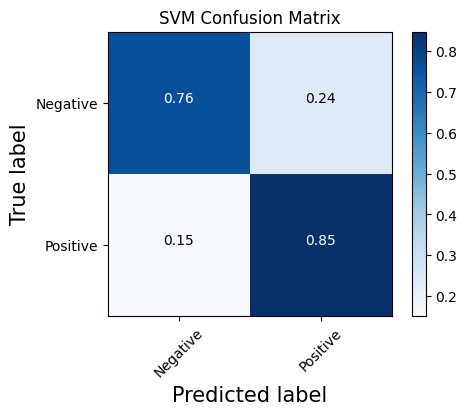

In [110]:
# Predict using the SVM Classifier
vect = CountVectorizer(max_features=5000) # Choosing the top 5000 features for predicting using SVM
X_train_transformed = vect.fit_transform(X_train) # combined step 2 and 3
X_test_transformed = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_transformed, y_train) # fit the model with training data

# Make predictions on test data
y_pred_svm = classifier.predict(X_test_transformed)

# calculate evaluation measures:
print("SVM Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm))
print("SVM Recall:",metrics.recall_score(y_test, y_pred_svm))
print("SVM F1-score:",metrics.f1_score(y_test, y_pred_svm))

cnf_matrix = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cnf_matrix,normalize=True,
                      title='SVM Confusion Matrix')

### Q6. Compare the results from (3), (4), and (5). Which one gives you the best results based on the F1 score? Any other observations you have from this exercise?

Based on the size of my data set, train-test split size, and the random state chosen in the code, I have noticed that the Logistic Regression model gives the best results based solely on the F1-score.

### Q7. Replace the bag of words with the bag of n-grams (feel free to experiment with any grams you like) as the text representation and see whether you will get better model performance.

Accuracy:  0.8692
Recall: 0.9112063686466626
F1 score: 0.9009990917347867


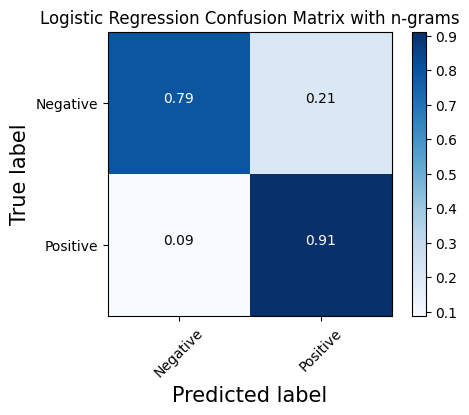

In [105]:
# Predict using Logistic Regression n-grams
vect = CountVectorizer(ngram_range=(1,3)) # Choosing the top 2000 features for predicting using SVM
X_train_transformed = vect.fit_transform(X_train) # combined step 2 and 3
X_test_transformed = vect.transform(X_test)

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_transformed, y_train)

y_pred_lr = logreg.predict(X_test_transformed)

# calculate evaluation measures:
print("Logistic Regression n-grams Accuracy: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Logistic Regression n-grams Recall:",metrics.recall_score(y_test, y_pred_lr))
print("Logistic Regression n-grams F1 score:",metrics.f1_score(y_test, y_pred_lr))

cnf_matrix = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cnf_matrix,normalize=True,title='Logistic Regression Confusion Matrix with n-grams')

I used the n-grams approach using the range of (1,3) on the Logistic Regression. 

I noticed a minor increase in the true positives, and true negatives of the prediction results.